Training Data Confusion Matrix:
[[2437    0]
 [   0 2460]]
Training Data Precision: 1.0000
Training Data Recall: 1.0000
Training Data F1-Score: 1.0000

Test Data Confusion Matrix:
[[624   0]
 [  0 601]]
Test Data Precision: 1.0000
Test Data Recall: 1.0000
Test Data F1-Score: 1.0000

Model Learning Outcome Inference:
The model is well-fitted (Similar performance on both training and test data).


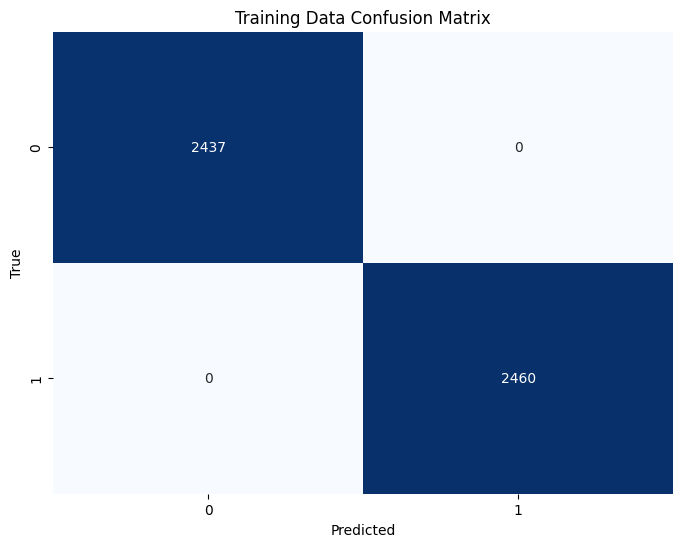

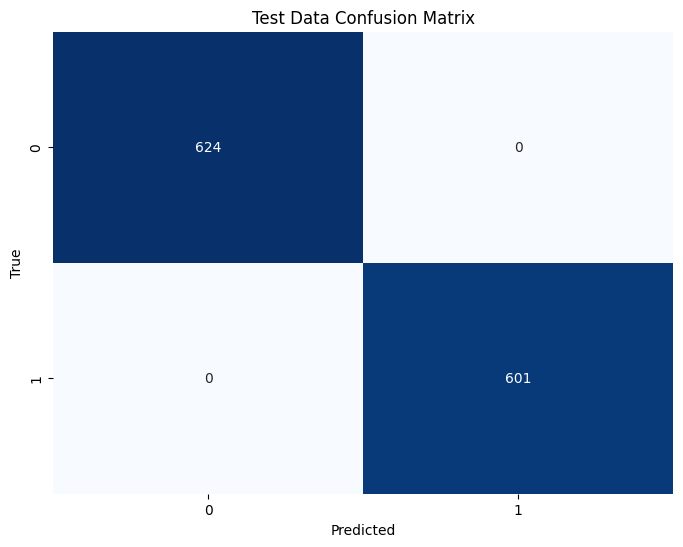

The model is well-fitted (Similar performance on both training and test data).


In [6]:
#A1

#Importing the libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #randomforest is used for the predicting the model outcome
import seaborn as sns
import matplotlib.pyplot as plt

#loading the dataset
file_path = ("/content/hindi.csv")
data = pd.read_csv(file_path)


# Function to convert text to a simple character-level feature vector
def text_to_vector(text, max_length):
    vec = [ord(char) for char in text]
    vec = vec + [0] * (max_length - len(vec))
    return np.array(vec)

# Function to calculate confusion matrix and performance metrics
def evaluate_performance(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, precision, recall, f1

# Function to infer model learning outcome based on performance metrics
def infer_learning_outcome(f1_train, f1_test):
    if f1_train > f1_test:
        if f1_test < 0.6:
            return "The model might be overfitting (Good performance on training data, poor on test data)."
        else:
            return "The model is performing regularly (Slightly better performance on training data)."
    elif f1_train < f1_test:
        return "The model might be underfitting (Better performance on test data than training data)."
    else:
        return "The model is well-fitted (Similar performance on both training and test data)."



# Determine the maximum length of the text in both columns
max_length = max(data['English'].apply(len).max(), data['Hindi'].apply(len).max())

# Convert English and Hindi phrases to feature vectors, with padding
english_features = data['English'].apply(lambda x: text_to_vector(x, max_length))
hindi_features = data['Hindi'].apply(lambda x: text_to_vector(x, max_length))

# Convert series of arrays into 2D numpy arrays for computation
english_matrix = np.stack(english_features.values)
hindi_matrix = np.stack(hindi_features.values)

# Combine English and Hindi samples by stacking them row-wise
X = np.vstack((english_matrix, hindi_matrix))
y = np.array([0] * len(english_matrix) + [1] * len(hindi_matrix))  # Binary labels: 0 for English, 1 for Hindi

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier (you can use any classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on training and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate performance on training data
cm_train, precision_train, recall_train, f1_train = evaluate_performance(y_train, y_pred_train)

# Evaluate performance on test data
cm_test, precision_test, recall_test, f1_test = evaluate_performance(y_test, y_pred_test)

# Output the results
print("Training Data Confusion Matrix:")
print(cm_train)
print(f"Training Data Precision: {precision_train:.4f}")
print(f"Training Data Recall: {recall_train:.4f}")
print(f"Training Data F1-Score: {f1_train:.4f}")
print()

print("Test Data Confusion Matrix:")
print(cm_test)
print(f"Test Data Precision: {precision_test:.4f}")
print(f"Test Data Recall: {recall_test:.4f}")
print(f"Test Data F1-Score: {f1_test:.4f}")
print()

# Infer model learning outcome
outcome = infer_learning_outcome(f1_train, f1_test)
print("Model Learning Outcome Inference:")
print(outcome)



# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for training data
plot_confusion_matrix(cm_train, 'Training Data Confusion Matrix')

# Plot confusion matrix for test data
plot_confusion_matrix(cm_test, 'Test Data Confusion Matrix')

# Inference based on results
if f1_train == 1.0 and f1_test == 1.0:
    print("The model is well-fitted (Similar performance on both training and test data).")
elif f1_train > f1_test:
    print("The model might be overfitting (Good performance on training data, slightly lower on test data).")
else:
    print("The model might be underfitting (Better performance on test data than training data).")



In [7]:
#A2
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

def load_all_sheets(file_path):
    return pd.read_excel(file_path, sheet_name=None)

def find_irctc_sheet(all_sheets):
    for sheet_name, df in all_sheets.items():
        if 'IRCTC Stock Price' in sheet_name or 'Price' in df.columns:
            return df
    return None

def calculate_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def calculate_rmse(y_true, y_pred):
    mse = calculate_mse(y_true, y_pred)
    return np.sqrt(mse)

def calculate_mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

def main():
    # Load the data from all sheets
    file_path = ("/content/Lab Session Data.xlsx")
    all_sheets = load_all_sheets(file_path)

    # Find the IRCTC sheet
    irctc_data = find_irctc_sheet(all_sheets)

    if irctc_data is None:
        print("IRCTC stock price data not found.")
        return

    # Assume 'Price' is the actual value and 'Predicted' is a column with your predictions
    y_true = irctc_data['Price']

    # For demonstration purposes, let's assume a simple prediction model
    y_pred = y_true * 0.99

    # Calculate metrics
    mse = calculate_mse(y_true, y_pred)
    rmse = calculate_rmse(y_true, y_pred)
    mape = calculate_mape(y_true, y_pred)
    r2 = calculate_r2(y_true, y_pred)

    # Print the results
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")
    print(f"R²: {r2}")

if __name__ == "__main__":
    main()

MSE: 249.41669084738984
RMSE: 15.792931673612403
MAPE: 0.010000000000000005
R²: 0.9957362111706666


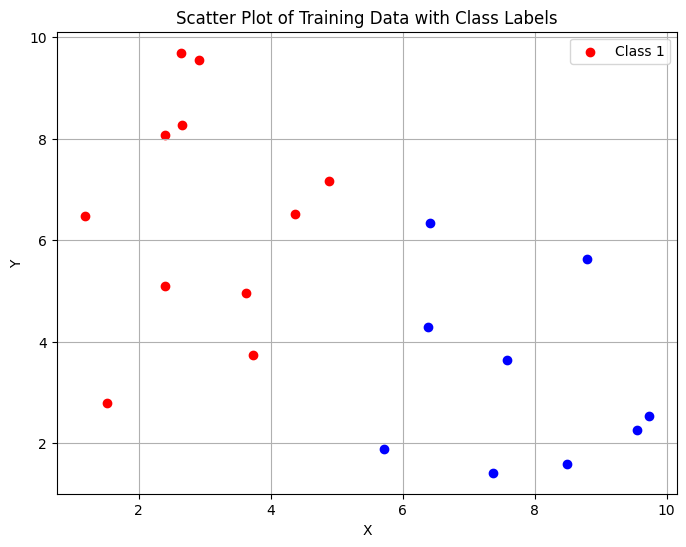

In [8]:
#A3
import numpy as np
import matplotlib.pyplot as plt

# Generate 20 data points with 2 features (X, Y)
np.random.seed(42)  # For reproducibility
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign classes based on a simple rule for demonstration (e.g., above or below the line Y = X)
classes = np.where(Y > X, 1, 0)

# Plotting
plt.figure(figsize=(8, 6))
for i in range(20):
    if classes[i] == 0:
        plt.scatter(X[i], Y[i], color='blue', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X[i], Y[i], color='red', label='Class 1' if i == 0 else "")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of Training Data with Class Labels")
plt.legend()
plt.grid(True)
plt.show()


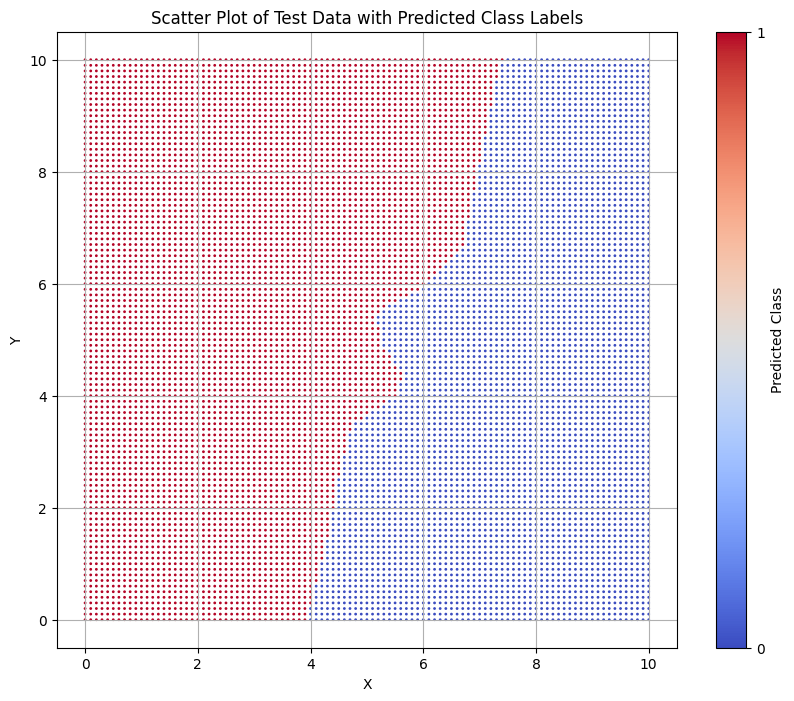

In [ ]:

#A4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate training data (as before)
np.random.seed(42)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
classes_train = np.where(Y_train > X_train, 1, 0)

# Stack X and Y to form training data points
training_data = np.column_stack((X_train, Y_train))

# Generate test set data
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test_flat = X_test.ravel()
Y_test_flat = Y_test.ravel()

# Stack X_test_flat and Y_test_flat to form test data points
test_data = np.column_stack((X_test_flat, Y_test_flat))

# kNN classifier with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_data, classes_train)

# Predict the class of the test data
predicted_classes = knn.predict(test_data)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(X_test_flat, Y_test_flat, c=predicted_classes, cmap='coolwarm', s=1)
plt.colorbar(ticks=[0, 1], label='Predicted Class')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of Test Data with Predicted Class Labels")
plt.grid(True)
plt.show()


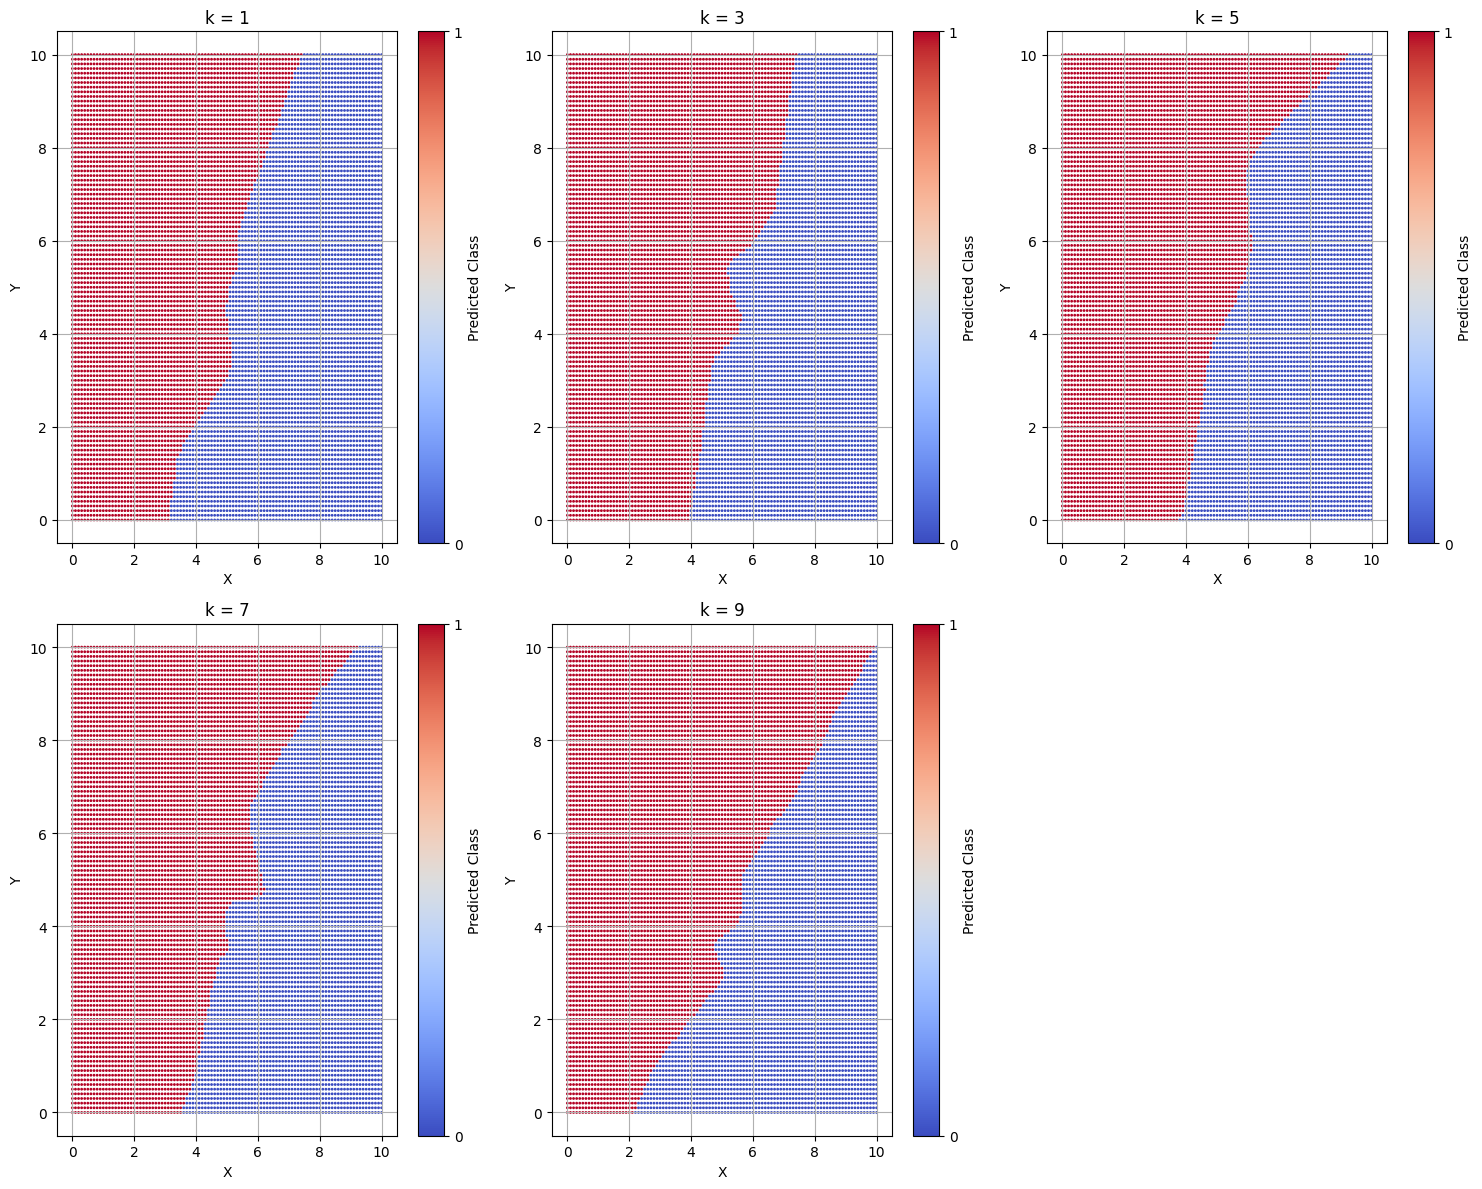

In [ ]:
#A5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate training data (as before)
np.random.seed(42)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
classes_train = np.where(Y_train > X_train, 1, 0)

# Stack X and Y to form training data points
training_data = np.column_stack((X_train, Y_train))

# Generate test set data
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test_flat = X_test.ravel()
Y_test_flat = Y_test.ravel()

# Stack X_test_flat and Y_test_flat to form test data points
test_data = np.column_stack((X_test_flat, Y_test_flat))

# Different values of k
k_values = [1, 3, 5, 7, 9]

# Plotting for each k
plt.figure(figsize=(15, 12))
for i, k in enumerate(k_values, 1):
    # kNN classifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data, classes_train)

    # Predict the class of the test data
    predicted_classes = knn.predict(test_data)

    # Plotting
    plt.subplot(2, 3, i)
    plt.scatter(X_test_flat, Y_test_flat, c=predicted_classes, cmap='coolwarm', s=1)
    plt.colorbar(ticks=[0, 1], label='Predicted Class')
    plt.title(f"k = {k}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#A6
import pandas as pd

# Load the dataset
file_path = '/content/hindi.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print(df.head())
print(df.columns)


from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Example: Selecting two features 'English' and 'Hindi'
feature_1 = 'English'
feature_2 = 'Hindi'

# Convert categorical data to numerical data
le = LabelEncoder()
df['Feature1_num'] = le.fit_transform(df[feature_1])
df['Feature2_num'] = le.fit_transform(df[feature_2])

# Create a new column 'Class' based on some condition (for example, sum of encoded values)
df['Class'] = np.where(df['Feature1_num'] + df['Feature2_num'] > df['Feature1_num'].median() + df['Feature2_num'].median(), 1, 0)


# A3: Generate and plot the training data
X_project = df[['Feature1_num', 'Feature2_num']].values[:20]
y_project = df['Class'].values[:20]

plt.figure(figsize=(8, 6))
for i, point in enumerate(X_project):
    plt.scatter(point[0], point[1], color='blue' if y_project[i] == 0 else 'red')
plt.title("Project Data Scatter Plot")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.grid(True)
plt.show()

#A4
from sklearn.neighbors import KNeighborsClassifier

# A4: Generate test set data
X_test_project = np.array([[x, y] for x in np.arange(0, max(df['Feature1_num'])+1, 0.1) for y in np.arange(0, max(df['Feature2_num'])+1, 0.1)])

# kNN classification with k=3
knn_project = KNeighborsClassifier(n_neighbors=3)
knn_project.fit(X_project, y_project)
y_pred_project = knn_project.predict(X_test_project)

# Scatter plot of the test data
plt.figure(figsize=(8, 6))
for i, point in enumerate(X_test_project):
    plt.scatter(point[0], point[1], color='blue' if y_pred_project[i] == 0 else 'red', s=1)
plt.title("Project Test Data Scatter Plot (k=3)")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.grid(True)
plt.show()


#A5
k_values = [1, 5, 10]  # Different k values

plt.figure(figsize=(18, 6))
for idx, k in enumerate(k_values):
    knn_project = KNeighborsClassifier(n_neighbors=k)
    knn_project.fit(X_project, y_project)
    y_pred_project = knn_project.predict(X_test_project)

    plt.subplot(1, len(k_values), idx + 1)
    for i, point in enumerate(X_test_project):
        plt.scatter(point[0], point[1], color='blue' if y_pred_project[i] == 0 else 'red', s=1)
    plt.title(f"Project Test Data Scatter Plot (k={k})")
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.grid(True)
plt.show()



In [3]:
#A7

#importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

def load_and_prepare_data():
    """Load the dataset and prepare features and labels."""
    file_path = '/content/hindi.csv'
    df = pd.read_csv(file_path)
    X = df[['English', 'Hindi']]
    num_samples = len(X)

    # Create labels, ensuring the length matches with features
    y = np.array([0] * (num_samples // 2) + [1] * (num_samples - num_samples // 2))
    np.random.shuffle(y)

    assert len(X) == len(y), "Mismatch between features and labels length"
    return X, y

def preprocess_data(X):
    """Convert text data to TF-IDF features and combine."""
    vectorizer_english = TfidfVectorizer()
    vectorizer_hindi = TfidfVectorizer()

    X_english = vectorizer_english.fit_transform(X['English']).toarray()
    X_hindi = vectorizer_hindi.fit_transform(X['Hindi']).toarray()

    # Combine English and Hindi TF-IDF features
    X_combined = np.hstack((X_english, X_hindi))
    return X_combined

def find_best_k(X_train, y_train):
    """Use GridSearchCV to find the best k value for KNN."""
    param_grid = {'n_neighbors': range(1, 21)}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['n_neighbors']

def classify_and_evaluate(X_train, y_train, X_test, y_test, best_k):
    """Classify using the best k and evaluate performance."""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with k={best_k}: {accuracy:.2f}")

def main():
    # Load and preprocess data
    X, y = load_and_prepare_data()
    X_vectorized = preprocess_data(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

    # Find the best k value
    best_k = find_best_k(X_train, y_train)
    print(f"The best k value is: {best_k}")

    # Classify and evaluate test data with the best k value
    classify_and_evaluate(X_train, y_train, X_test, y_test, best_k)

if __name__ == "__main__":
    main()

The best k value is: 20
Accuracy with k=20: 0.49
